# Video Games Classification

### Importing Libraries:

In [21]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import statistics
from statistics import median
import plotly.graph_objs as go
from plotly import figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#pip install plotly
#conda install -c plotly chart-studio


###                                      VIDEO GAME SALES EXPLORATORY  DATA  ANALYSIS


In [5]:
vgsales=pd.read_csv(r'C:\Users\gohil\Desktop\Trim 3\Python\vgsales.csv')


In [6]:
vgsales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6.0,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7.0,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8.0,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9.0,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10.0,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
vgsales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [8]:
vgsales['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [9]:
vgsales['Genre'].value_counts()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

In [10]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16327 non-null float64
Name            16327 non-null object
Platform        16327 non-null object
Year            16327 non-null float64
Genre           16327 non-null object
Publisher       16291 non-null object
NA_Sales        16327 non-null float64
EU_Sales        16327 non-null float64
JP_Sales        16327 non-null float64
Other_Sales     16327 non-null float64
Global_Sales    16327 non-null float64
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In this data set there are 11 columns. Their names and data types as follows:

* **Rank** - Ranking of overall sales, integer

* **Name** - The games name, object

* **Platform** - Platform of the games release (i.e. PC,PS4, etc.), object

* **Year** - Year of the game's release, float

* **Genre** - Genre of the game ,object

* **Publisher** - Publisher of the game

* **NA_Sales** - Sales in North America (in millions)

* **EU_Sales** - Sales in Europe (in millions)

* **JP_Sales** - Sales in Japan (in millions)

* **Other_Sales** - Sales in the rest of the world (in millions)

* **Global_Sales** - Total worldwide sales.

In [11]:
unique = vgsales.nunique()
unique

Rank            16327
Name            11360
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [12]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Median Computation

In [13]:
median(vgsales['Global_Sales'])

0.14

In [14]:
median(vgsales['NA_Sales'])

0.23

### Mode Computation

In [15]:
statistics.mode(vgsales['Genre'])

'Action'

In [16]:
statistics.mode(vgsales['Publisher'])

'Electronic Arts'

### Displaying Null Values

In [17]:
vgsales.isnull().sum()

Rank            271
Name            271
Platform        271
Year            271
Genre           271
Publisher       307
NA_Sales        271
EU_Sales        271
JP_Sales        271
Other_Sales     271
Global_Sales    271
dtype: int64

### Null values removed

In [18]:
vgsales=vgsales.dropna()

## Data Visualisation

### 1. Violin Plot

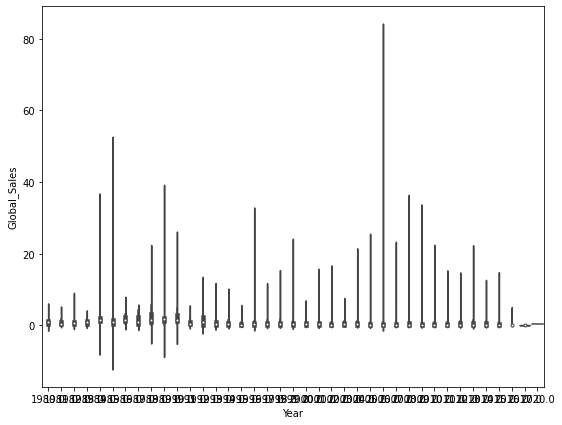

In [23]:
fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x = vgsales["Year"], 
                y = vgsales["Global_Sales"] ) 


### 2. Scatter plot

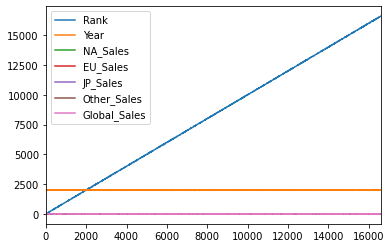

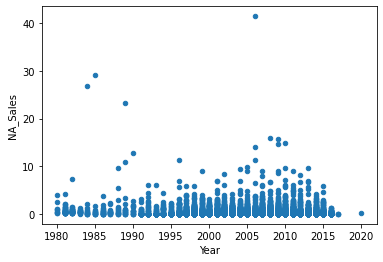

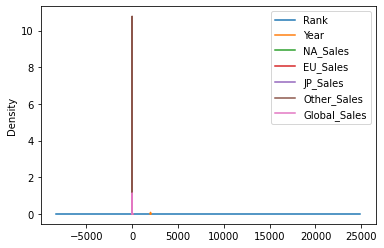

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df  = pd.read_csv(r"C:\Users\gohil\Desktop\Trim 3\Python\vgsales.csv")
df.plot()  # plots all columns against index
df.plot(kind='scatter',x='Year',y='NA_Sales') # scatter plot
df.plot(kind='density')  # estimate density function
# df.plot(kind='hist')  # histogram

### 3. Heat Map

a. Following heatmap represents the collinearity of the multiple variables in the dataset

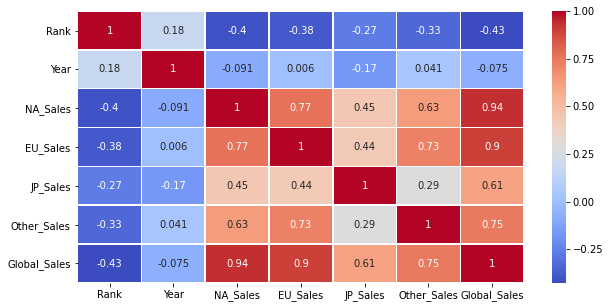

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

## Regression Models used:

##### A. Linear Regression
#####  B. Multiple Regression

### A. Linear Regression


In [30]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [31]:
# pip install sklearn

In [43]:
df=pd.read_csv(r'C:\Users\gohil\Desktop\Trim 3\Python\vgsales_clean.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


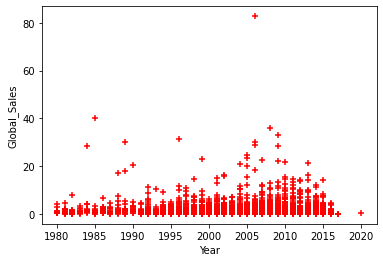

In [44]:
# matplotlib inline
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.scatter(df.Year,df.Global_Sales,color='red',marker='+')

In [45]:
YEAR = df.drop(['Global_Sales','Rank','Name','Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis='columns')
YEAR

,Year
0,2006
1,1985
2,2008
3,2009
4,1996
...,...
16322,2002
16323,2003
16324,2008
16325,2010


In [46]:
GS = df.Global_Sales
GS

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16322     0.01
16323     0.01
16324     0.01
16325     0.01
16326     0.01
Name: Global_Sales, Length: 16327, dtype: float64

In [47]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(YEAR,GS)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Finding the Co-efficient and Intercept 

In [49]:
reg.coef_

array([-0.02007463])

In [50]:
reg.intercept_

40.81810425429475

Predicting the Global Sales for the year 2021

In [53]:
reg.predict([[2021]])

array([0.24727123])

In [52]:
-0.02007463*2021+40.81810425429475

0.2472770242947533

## Equation For the Linear Graph

In [ ]:
Global_Sales = -0.02007463*Year + 40.81810425429475

### Multiple Regression

In [57]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

In [58]:
df=pd.read_csv(r'C:\Users\gohil\Desktop\Trim 3\Python\vgsales_clean.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [59]:
X = df[['NA_Sales','EU_Sales']]
Y = df['Global_Sales']

In [60]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.03551221390102277
Coefficients: 
 [1.15028196 1.35148341]


In [62]:
NewNASales = 42
NewEUSALES = 30
print ('Predicted Global Sales: \n', regr.predict([[NewNASales,NewEUSALES]]))

Predicted Global Sales: 
 [88.89185701]


In [63]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

C:\Users\gohil\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [64]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [65]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.238e+05
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:12:11   Log-Likelihood:                -3163.5
No. Observations:               16327   AIC:                             6333.
Df Residuals:                   16324   BIC:                             6356.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0355      0.002     14.672      0.0